In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.cluster

import time

from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
    AllChem
)

In [74]:
def similarity_matrix(df):
    
    for i in range(df.shape[0]):
        

#### In this sample code, we will test out a few clustering algorithms from sklearn.cluster package
https://scikit-learn.org/stable/modules/clustering.html#

* k-means
* DBSCAN
* Agglomerative Hierarchical
* Spectral
* Affinity Propagation

In [77]:
# Set path for loading dataset from your local computer
dataset_path = '/Users/hek/Research/Cheminformatics/Project_1_NPS/Stimulant vs. Hallucinogens/Dataset/Bioassay data/ChEMBL data/'
dataset_output_path = '/Users/hek/Research/Cheminformatics/Project_3_ML for Raman data/ML results_Cluster Ensemble/ChEMBL data/'
result_output_path = '/Users/hek/Research/Cheminformatics/Project_3_ML for Raman data/ML results_Cluster Ensemble/'

In [96]:
# The ChEMBL data set that we will apply clustering algorithm to
df = pd.read_csv(dataset_output_path+"Final dataset CB1_P21554_EC50.csv")

In [99]:
# Calculate morgan fingerprint use RDkit
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="canonical_smiles")
df["morgan"] = df.ROMol.apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x,2, nBits=1024))

Data set contains N = 3155 data points


,canonical_smiles,label,ROMol,morgan
0,Cn1c(C(=O)NN2CCCCC2)nc(-c2ccc(Cl)cc2)c1-c1ccc(...,1.0,,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Cn1c(C(=O)NC2CCCCC2)nc(-c2ccc(Cl)cc2)c1-c1ccc(...,1.0,,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

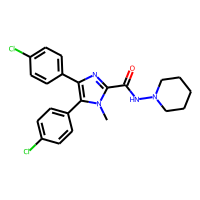
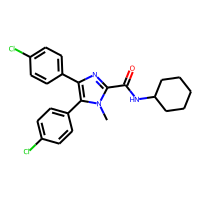

In [100]:
print("Data set contains N =", df.shape[0], "data points")
# Display first two data points (rows)
df.head(2)

* Each data point is a compound that is tested in bioassay for its bioactivity at the molecular target. 
* The "active" label indicates whether this compound is regard as "active (1)" or "inactive (0)"
* The ratio between active/inactive is kept at 1:4

* Molecular fingerprint Morgan (1024-bits) is used as attributes. 

In [206]:
X_matrix=pd.DataFrame(columns=[i for i in range(df.shape[0])])

In [207]:
fps = df['morgan'].to_list()
start_time = time.time()
for i in range(df.shape[0]):
    fp_query = df.loc[i,"morgan"]
    smis = DataStructs.BulkTanimotoSimilarity(fp_query, fps)
    X_matrix.loc[i,:]= smis
time_taken=time.time()-start_time
print(time_taken, "s")

156.43312096595764 s


In [208]:
X_matrix

,0,1,2,3,4,5,6,7,8,9,...,3145,3146,3147,3148,3149,3150,3151,3152,3153,3154
0,1.0,0.666667,0.784314,0.533333,0.166667,0.246753,0.240506,0.234568,0.171053,0.164557,...,0.116883,0.157143,0.109756,0.125,0.128571,0.088608,0.164384,0.125,0.166667,0.116279
1,0.666667,1.0,0.533333,0.788462,0.179487,0.25974,0.253165,0.2625,0.184211,0.148148,...,0.115385,0.242424,0.164557,0.123596,0.126761,0.074074,0.162162,0.1375,0.2375,0.127907
2,0.784314,0.533333,1.0,0.706897,0.272727,0.355263,0.346154,0.3375,0.28,0.207317,...,0.134146,0.128205,0.113636,0.115789,0.146667,0.094118,0.164557,0.114943,0.153846,0.119565
3,0.533333,0.788462,0.706897,1.0,0.285714,0.368421,0.358974,0.367089,0.293333,0.190476,...,0.13253,0.202703,0.164706,0.114583,0.144737,0.08046,0.1625,0.126437,0.218391,0.130435
4,0.166667,0.179487,0.272727,0.285714,1.0,0.471429,0.615385,0.597015,0.777778,0.151163,...,0.120482,0.073171,0.076923,0.070707,0.116883,0.068966,0.121951,0.054348,0.117021,0.084211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,0.088608,0.074074,0.094118,0.08046,0.068966,0.088889,0.086957,0.085106,0.070588,0.08046,...,0.08642,0.092105,0.094118,0.052083,0.125,1.0,0.12987,0.057471,0.123596,0.113636
3151,0.164384,0.162162,0.164557,0.1625,0.121951,0.227848,0.207317,0.188235,0.139241,0.107143,...,0.12987,0.138889,0.260274,0.162791,0.176471,0.12987,1.0,0.123457,0.164706,0.2125
3152,0.125,0.1375,0.114943,0.126437,0.054348,0.096774,0.106383,0.115789,0.043956,0.088889,...,0.069767,0.12987,0.168675,0.141304,0.089744,0.057471,0.123457,1.0,0.130435,0.120879
3153,0.166667,0.2375,0.153846,0.218391,0.117021,0.208791,0.191489,0.1875,0.131868,0.092784,...,0.086957,0.202532,0.206897,0.177083,0.120482,0.123596,0.164706,0.130435,1.0,0.182796


#### Preprocess data set

In [209]:
# true label
Y = df.label
print(len(Y))
print("Total number of actives = ", sum(Y))

3155
Total number of actives =  631.0


#### Setup algorithms
We will use default settting for most parameters

In [266]:
k_means = sklearn.cluster.KMeans(n_clusters=12)
dbscan = sklearn.cluster.DBSCAN()
agglomerative = sklearn.cluster.AgglomerativeClustering()
spectral = sklearn.cluster.SpectralClustering()
affinity_prop = sklearn.cluster.AffinityPropagation(random_state=None)

In [30]:
agglomerative

AgglomerativeClustering()

#### Use one algorithm

In [267]:
#Apply the algorithm to the X_df (features) and predict cluster label for each sample (object)
df["kmeans"] = k_means.fit_predict(X_df)

### Evaluate clustering performance
For ChEMBL data sets, the success of clustering is evaluated according to how well the actives can be separated from inactives. 

#### QPI
* Identify active cluster vs. inactive cluster (non-singleton cluster for which the percentrage of active molecules in the cluster is greater than the percentrage of active molecules in the dataset as a whole)
* percent active = 20% 
* p = number of active molecules in the active clusters
* q = number of inactive molecules in the active clusters
* r = number of active molecules in the inactive clusters
* s = number of singleton active molecules
* QPI = p/(p+q+r+s)
   

In [268]:
df.groupby(["kmeans"]).count()

,canonical_smiles,label,ROMol,morgan
kmeans,,,,
0,942,942,942,942
1,43,43,43,43
2,153,153,153,153
3,40,40,40,40
4,145,145,145,145
5,46,46,46,46
6,701,701,701,701
7,838,838,838,838
8,28,28,28,28


In [269]:
df.groupby(["kmeans"]).sum()

,label
kmeans,
0,69.0
1,42.0
2,2.0
3,37.0
4,145.0
5,46.0
6,41.0
7,49.0
8,28.0


In [270]:
actives = df.groupby(["kmeans"]).sum()["label"]

In [271]:
sum(actives)

631.0

In [272]:
count = df.groupby(["kmeans"]).count()["canonical_smiles"]

In [273]:
sum(count)

3155

In [274]:
p,q,r,s=0,0,0,0

for i in range(len(actives)):
    print("cluster", i)
    if actives[i]/count[i] >= 0.20:
        if actives[i] != 1:
            print("active clusters")
            print("active molecules in active clusters", actives[i])
            p += actives[i]
            print("inactive molecules in active clusters", count[i]-actives[i])
            q += (count[i]-actives[i])
        else:
            s += actives[i]
    else:
        print("inactive clusters")
        r += actives[i]

cluster 0
inactive clusters
cluster 1
active clusters
active molecules in active clusters 42.0
inactive molecules in active clusters 1.0
cluster 2
inactive clusters
cluster 3
active clusters
active molecules in active clusters 37.0
inactive molecules in active clusters 3.0
cluster 4
active clusters
active molecules in active clusters 145.0
inactive molecules in active clusters 0.0
cluster 5
active clusters
active molecules in active clusters 46.0
inactive molecules in active clusters 0.0
cluster 6
inactive clusters
cluster 7
inactive clusters
cluster 8
active clusters
active molecules in active clusters 28.0
inactive molecules in active clusters 0.0
cluster 9
inactive clusters
cluster 10
active clusters
active molecules in active clusters 112.0
inactive molecules in active clusters 0.0
cluster 11
active clusters
active molecules in active clusters 60.0
inactive molecules in active clusters 0.0


In [275]:
p

470.0

In [276]:
q

4.0

In [277]:
r

161.0

In [278]:
s

0

In [279]:
print(p/(p+q+r+s))

0.7401574803149606
